# Lab 5

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Thomatous/geog510-labs/blob/main/lab_05.ipynb)

## Exercise 1: Calculating Distances with Functions

- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiple pairs of coordinates.

In [354]:
from typing import Tuple
from math import radians, sin, cos, sqrt, atan2

R: float = 6371.0

def calculate_distance(coord1: Tuple[float, float], coord2: Tuple[float, float]) -> float:
    dlat = radians(coord2[0] - coord1[0])
    dlon = radians(coord2[1] - coord1[1])
    a = (
        sin(dlat / 2) ** 2
        + cos(radians(coord1[0])) * cos(radians(coord2[0])) * sin(dlon / 2) ** 2
    )
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance


coord1 = (34.0522, -118.2437)
coord2 = (-33.8688, 151.2093)
coord3 = (51.5074, -0.1278)
coord4 = (-34.6037, -58.3816)

print(f"Distance between {coord1} and {coord2}: {calculate_distance(coord1, coord2):.2f} km")
print(f"Distance between {coord2} and {coord3}: {calculate_distance(coord2, coord3):.2f} km")
print(f"Distance between {coord3} and {coord4}: {calculate_distance(coord3, coord4):.2f} km")
print(f"Distance between {coord4} and {coord4}: {calculate_distance(coord4, coord4):.2f} km")

Distance between (34.0522, -118.2437) and (-33.8688, 151.2093): 12073.51 km
Distance between (-33.8688, 151.2093) and (51.5074, -0.1278): 16993.93 km
Distance between (51.5074, -0.1278) and (-34.6037, -58.3816): 11127.80 km
Distance between (-34.6037, -58.3816) and (-34.6037, -58.3816): 0.00 km


## Exercise 2: Batch Distance Calculation

- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [355]:
from typing import List

def batch_distance_calcuation(coords: List[Tuple[float, float]]) -> List[float]:
    distances = []
    for coord1, coord2 in zip(coords, coords[1:]):
        distances.append(calculate_distance(coord1, coord2))
    return distances

coords = [(34.0522, -118.2437) ,(-33.8688, 151.2093) ,(51.5074, -0.1278) ,(-34.6037, -58.3816)]
print(f"Consecutive distances between {coords}: {batch_distance_calcuation(coords)}")

Consecutive distances between [(34.0522, -118.2437), (-33.8688, 151.2093), (51.5074, -0.1278), (-34.6037, -58.3816)]: [12073.50672923804, 16993.933459795906, 11127.795650485907]


## Exercise 3: Creating and Using a Point Class

- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [356]:
from dataclasses import dataclass

@dataclass
class Point():
    name: str
    latitude: float
    longtitude: float
    
    def get_coords(self) -> Tuple[float, float]:
        return (self.latitude, self.longtitude)

    def distance_to(self, point) -> float:
        return calculate_distance(self.get_coords(), point.get_coords())

point1 = Point("Tokyo", 35.6895, 139.6917)
point2 = Point( "Los Angeles", 34.0522, -118.2437)
point3 = Point("Mount Everest", 27.9881, 86.9250)
point4 = Point("Miami", 25.7617, -80.1918)

print(f"Distance from {point1.name} to {point2.name}: {point1.distance_to(point2):.2f} km")
print(f"Distance from {point3.name} to {point2.name}: {point3.distance_to(point2):.2f} km")
print(f"Distance from {point4.name} to {point1.name}: {point4.distance_to(point1):.2f} km")
print(f"Distance from {point4.name} to {point4.name}: {point4.distance_to(point4):.2f} km")

Distance from Tokyo to Los Angeles: 8815.47 km
Distance from Mount Everest to Los Angeles: 12625.07 km
Distance from Miami to Tokyo: 12000.44 km
Distance from Miami to Miami: 0.00 km


## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [357]:
from pathlib import Path

def line_to_coord(line: str) -> Tuple[float, float]:
    try:
        coords = line.strip().split(',')
        if len(coords) != 2:
            raise ValueError("Line does not contain exactly two coordinates.")
        return tuple(float(coord) for coord in coords)
    except ValueError as e:
        print(f"Error: {e}. Could not parse line: {line.strip()}")
        raise
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        raise

def read_coordinates(file_path: Path) -> List[Tuple[float, float]]:
    try:
        with open(file_path, 'r') as file:
            return [line_to_coord(line) for line in file]
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
    except Exception as e:
        print(f"An unexpected error occurred while processing the file: {e}")

def write_coordinates(file_path: Path, coords: List[Tuple[float, float]]) -> None:
    try:
        with open(file_path, 'w') as file:
            for coord in coords:
                file.write(f"{coord[0]},{coord[1]}\n")
    except Exception as e:
        print(f"An unexpected error occurred while writing the file: {e}")

## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [358]:
# Create a sample coordinates.txt file
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")

Sample file 'coordinates.txt' has been created successfully.


In [359]:
def generate_points_from_file(file_path: Path) -> List[Point]:
    coords = read_coordinates(file_path)
    return [Point('Undefined', coord[0], coord[1]) for coord in coords]

def batch_calculate_point_distance(points: List[Point]) -> List[float]:
    distances = []
    for point1, point2 in zip(points, points[1:]):
        distances.append(point1.distance_to(point2))
    return distances

def write_distances(file_path: Path, distances: List[float]) -> None:
    try:
        with open(file_path, 'w') as file:
            for distance in distances:
                file.write(f"{distance}\n")
    except Exception as e:
        print(f"An unexpected error occurred while writing the file: {e}")

def write_distances_file_from_coordinates_file(input_file_path: Path, output_file_path: Path) -> None:
    try:
        points = generate_points_from_file(input_file_path)
        if not points:
            print("No points generated from the input file.")
            return
        distances = batch_calculate_point_distance(points)
        write_distances(output_file_path, distances)
    except Exception as e:
        print(f"An unexpected error occurred while processing the file: {e}")

write_distances_file_from_coordinates_file(Path("coordinates.txt"), Path("distances.txt"))

## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [360]:
def is_valid_coord(coord: Tuple[float, float]) -> bool:
    return -90 <= coord[0] <= 90 and -180 <= coord[1] <= 180

def calculate_distance(coord1: Tuple[float, float], coord2: Tuple[float, float]) -> float:
    try:
        if not is_valid_coord(coord1):
            raise ValueError("coord1 has invalid latitude or longitude values.")
        if not is_valid_coord(coord2):
            raise ValueError("coord2 has invalid latitude or longitude values.")

        dlat = radians(coord2[0] - coord1[0])
        dlon = radians(coord2[1] - coord1[1])
        a = (
            sin(dlat / 2) ** 2
            + cos(radians(coord1[0])) * cos(radians(coord2[0])) * sin(dlon / 2) ** 2
        )
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        return distance
    except TypeError as e:
        print(f"TypeError in calculate_distance: {e}")
        raise
    except ValueError as e:
        print(f"ValueError in calculate_distance: {e}")
        raise
    except IndexError as e:
        print(f"IndexError in calculate_distance: {e}")
        raise
    except Exception as e:
        print(f"Unexpected error in calculate_distance: {e}")
        raise


def batch_distance_calcuation(coords: List[Tuple[float, float]]) -> List[float]:
    distances = []
    for coord1, coord2 in zip(coords, coords[1:]):
        try:
            distance = calculate_distance(coord1, coord2)
            distances.append(distance)
        except TypeError as e:
            print(f"TypeError in batch_distance_calculation: {e}. Skipping this pair of coordinates.")
            continue
        except ValueError as e:
            print(f"ValueError in batch_distance_calculation: {e}. Skipping this pair of coordinates.")
            continue
        except IndexError as e:
            print(f"IndexError in batch_distance_calculation: {e}. Skipping this pair of coordinates.")
            continue
        except Exception as e:
            print(f"Unexpected error in batch_distance_calculation: {e}. Skipping this pair of coordinates.")
            continue
    return distances

## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [361]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [362]:
import numpy as np

coords = np.array([[35.6895, 139.6917],
                   [40.7128, -74.0060],
                   [51.5074, -0.1278],
                   [48.8566, 2.3522]])
print(f"Coordinates in degrees: {coords}")

coords_radians = np.radians(coords)
print(f"Coordinates in radians: {coords_radians}")

differences = coords_radians - coords_radians[0, :]
print(f"Differences in radians: {differences}")

Coordinates in degrees: [[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]]
Coordinates in radians: [[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]
Differences in radians: [[ 0.          0.        ]
 [ 0.08767312 -3.72972847]
 [ 0.27607444 -2.44031063]
 [ 0.22980925 -2.39702647]]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [363]:
%pip install pandas
%pip install requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [364]:
import pandas as pd

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)

df.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [365]:
df_dropped = df.dropna()
df_dropped

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [366]:
df_filtered = df[df['population'] > 1_000_000]
df_filtered

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [367]:
df_grouped = df.groupby("country")["population"].sum()
df_grouped

country
AFG     4931702
AGO     6821544
ALB      895350
ALD       10682
AND       53998
         ...   
WSM       61916
YEM     3759000
ZAF    13373789
ZMB     2326947
ZWE     2611745
Name: population, Length: 200, dtype: int64

## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

In [368]:
%pip install geopandas
%pip install matplotlib
%pip install branca
%pip install folium
%pip install mapclassify 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [369]:
import geopandas as gpd

url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)
gdf

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
...,...,...,...,...,...,...,...,...
1201,9764,26.54,22.30,24.42,696.24,36,New York,"POLYGON ((-73.97463 40.72411, -73.97467 40.724..."
1202,9765,10.44,16.53,13.48,2859.96,36,New York,"POLYGON ((-73.98495 40.71911, -73.98436 40.718..."
1203,9766,10.44,13.87,12.16,2859.96,36,New York,"POLYGON ((-73.98495 40.71911, -73.98436 40.718..."
1204,9774,13.76,NaN,13.76,1612.84,36,New York,"POLYGON ((-73.99154 40.71045, -73.99173 40.710..."


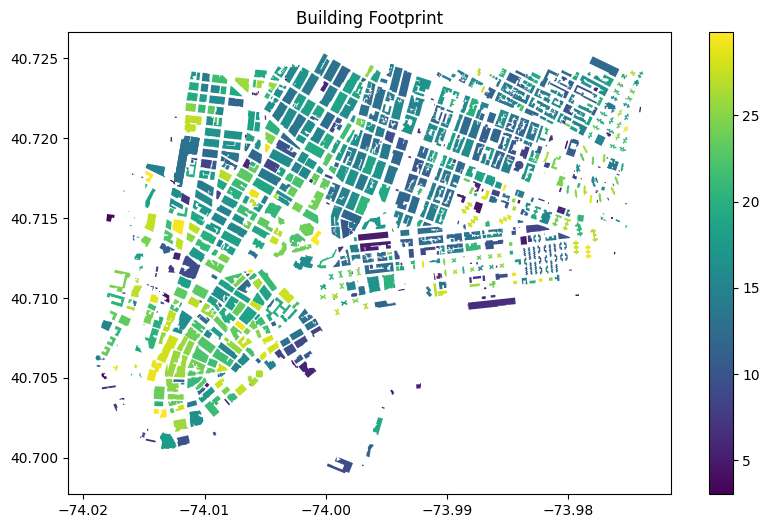

In [370]:
import matplotlib.pyplot as plt

gdf.plot("height_MS", legend=True, figsize=(10, 6))
plt.title("Building Footprint")
plt.show()

In [371]:
gdf.explore("height_MS", legend=False)

In [372]:
average_height = gdf["height_MS"].mean()
average_height

np.float64(15.454691136974038)

In [373]:
higher_than_average_buildings = gdf[gdf["height_MS"] > average_height]
higher_than_average_buildings

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
5,38,18.84,NaN,18.84,1151.88,36,New York,"POLYGON ((-74.01574 40.70672, -74.01537 40.706..."
...,...,...,...,...,...,...,...,...
1196,9714,19.90,19.15,19.52,1230.57,36,New York,"POLYGON ((-73.98328 40.71861, -73.9826 40.7184..."
1198,9752,19.35,NaN,19.35,4080.25,36,New York,"POLYGON ((-73.99528 40.70245, -73.99568 40.702..."
1199,9754,24.11,47.47,35.79,7137.13,36,New York,"POLYGON ((-74.00084 40.71547, -74.00075 40.715..."
1200,9756,16.20,15.17,15.68,166.41,36,New York,"POLYGON ((-73.99054 40.71271, -73.99045 40.712..."


In [374]:
output_file = "nyc_buildings.geojson"
gdf.to_file(output_file, driver="GeoJSON")
print(f"GeoDataFrame has been written to {output_file}")

GeoDataFrame has been written to nyc_buildings.geojson


## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [375]:
import pandas as pd

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)

df

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [376]:
filtered_df = df[df['latitude'].between(-40, 60)]
filtered_df

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.58330,32.53330,75000
1,2,Fort Portal,UGA,0.67100,30.27500,42670
2,3,Potenza,ITA,40.64200,15.79900,69060
3,4,Campobasso,ITA,41.56300,14.65600,50762
4,5,Aosta,ITA,45.73700,7.31500,34062
...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700


In [377]:
gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df.longitude, filtered_df.latitude))
gdf

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (7.315 45.737)
...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-43.22502 -22.92502)
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-46.62502 -23.55868)
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (151.18518 -33.92001)
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (103.85582 1.29303)


In [378]:
gdf.crs = "epsg:4326" # Setting the initial CRS
gdf_3857 = gdf.to_crs(epsg=3857)

gdf_3857

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.58330,32.53330,75000,POINT (3621590.39 64933.781)
1,2,Fort Portal,UGA,0.67100,30.27500,42670,POINT (3370197.584 74697.086)
2,3,Potenza,ITA,40.64200,15.79900,69060,POINT (1758736.635 4959679.293)
3,4,Campobasso,ITA,41.56300,14.65600,50762,POINT (1631498.457 5095742.084)
4,5,Aosta,ITA,45.73700,7.31500,34062,POINT (814302.075 5738302.989)
...,...,...,...,...,...,...,...
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000,POINT (-4811787.216 -2622953.59)
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000,POINT (-5190273.485 -2699722.817)
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000,POINT (16829857.253 -4018066.374)
1247,1248,Singapore,SGP,1.29303,103.85582,5183700,POINT (11561176.998 143951.661)


In [379]:
gdf_3857 = gdf_3857.set_index("name")

In [380]:
paris_point = gdf_3857.loc["Paris", "geometry"]
gdf_3857["distance_to_paris"] = gdf_3857["geometry"].distance(paris_point)
gdf_3857

# print(gdf_3857.loc["Paris", "distance_to_paris"]) # Print for validation

,id,country,latitude,longitude,population,geometry,distance_to_paris
name,,,,,,,
Bombo,1,UGA,0.58330,32.53330,75000,POINT (3621590.39 64933.781),7.041672e+06
Fort Portal,2,UGA,0.67100,30.27500,42670,POINT (3370197.584 74697.086),6.916454e+06
Potenza,3,ITA,40.64200,15.79900,69060,POINT (1758736.635 4959679.293),1.979335e+06
Campobasso,4,ITA,41.56300,14.65600,50762,POINT (1631498.457 5095742.084),1.794231e+06
Aosta,5,ITA,45.73700,7.31500,34062,POINT (814302.075 5738302.989),7.561058e+05
...,...,...,...,...,...,...,...
Rio de Janeiro,1245,BRA,-22.92502,-43.22502,11748000,POINT (-4811787.216 -2622953.59),1.022204e+07
Sao Paulo,1246,BRA,-23.55868,-46.62502,18845000,POINT (-5190273.485 -2699722.817),1.048050e+07
Sydney,1247,AUS,-33.92001,151.18518,4630000,POINT (16829857.253 -4018066.374),1.949483e+07


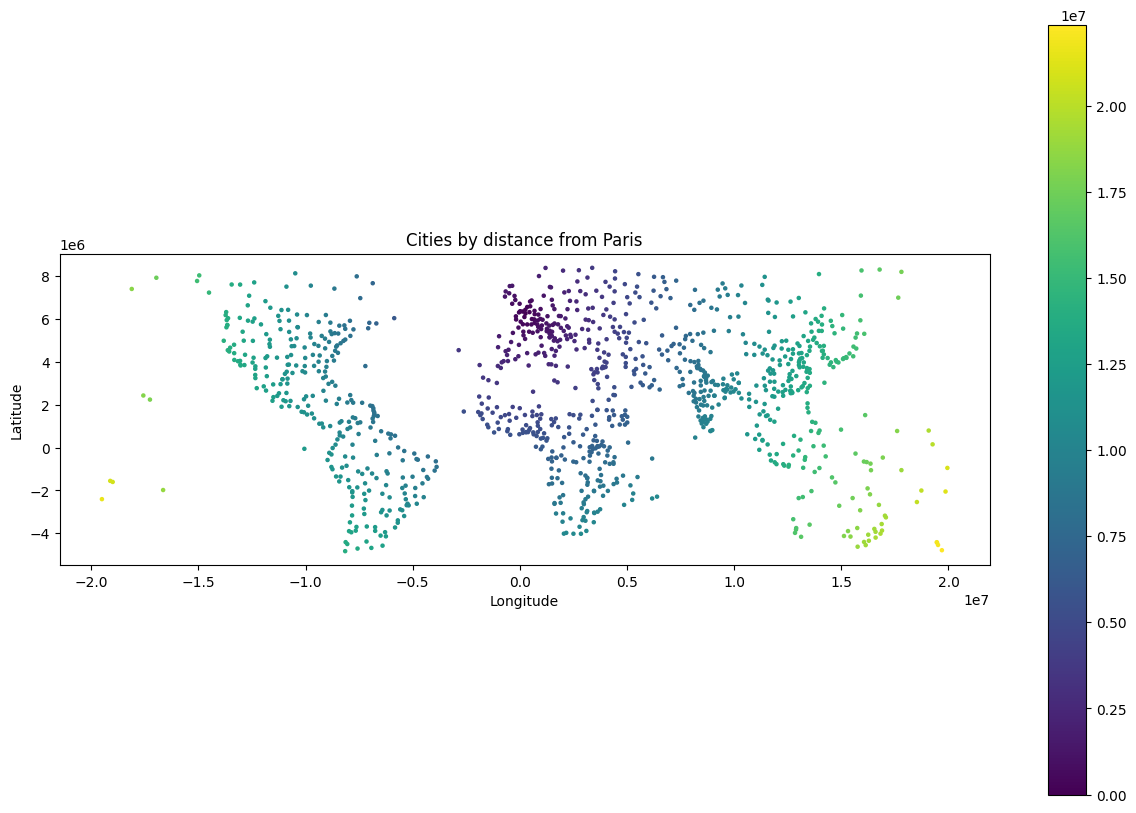

In [381]:
fig, ax = plt.subplots(figsize=(15, 10))
gdf_3857.plot(column='distance_to_paris', ax=ax, legend=True, cmap='viridis', markersize=5)
plt.title("Cities by distance from Paris")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Submission Requirements

Complete the exercises above and and upload the notebook to your GitHub repository. Make sure the notebook has a Colab badge at the top so that it can be easily opened in Google Colab. Submit the URL of the notebook to Canvas.